# Homework 1 (HW1)

---
By the end of this homework we expect you to be able to:
1. Load data from different formats using [pandas](https://pandas.pydata.org/);
2. Navigate the documentation of Python packages by yourself;
3. Filter and tidy up noisy data sets;
4. Aggregate your data in different (and hopefully helpful) ways; 
5. Create meaningful visualizations to analyze the data;
6. Critically think and write about data;
---

## Important Dates

- Homework release: Fri 8 Oct 2021
- **Homework due**: Fri 22 Oct 2021, 23:59
- Grade release: Fri 29 Oct 2021

---

##  Some rules

1. You are allowed to use any built-in Python library that comes with Anaconda. If you want to use an external library, 
you may do so, but must justify your choice.
2. Make sure you use the `data` folder provided in the repository in read-only mode. (Or alternatively, be sure you 
don’t change any of the files.)
3. Be sure to provide a textual description of your thought process, the assumptions you made, the solution you 
implemented, and explanations for your answers. A notebook that only has code cells will not suffice.
4. For questions containing the **/Discuss:/** prefix, answer not with code, but with a textual explanation
 (**in markdown**).
5. Back up any hypotheses and claims with data, since this is an important aspect of the course.
6. Please write all your comments in English, and use meaningful variable names in your code. Your repo should have a 
single notebook (plus the required data files) in the *master/main* branch. If there are multiple notebooks present, 
we will **not grade** anything.
7. We will **not run your notebook for you**! Rather, we will grade it as is, which means that only the results 
contained in your evaluated code cells will be considered, and we will not see the results in unevaluated code cells. 
Thus, be sure to hand in a **fully-run and evaluated notebook**. In order to check whether everything looks as intended,
 you can check the rendered notebook on the GitHub website once you have pushed your solution there.
8. In continuation to the previous point, interactive plots, such as those generated using `plotly`, should be 
**strictly avoided**!
9. Make sure to print results or dataframes that confirm you have properly addressed the task.

---

## Context

In this project, we are going to analyze data from an experiment about *honesty*. 
Oftentimes, we are asked to confirm our honest intentions by signing **at the end** of a document. 
For example, in tax returns or insurance policy forms, we are often asked to sign our names under a text that reads 
something like "I hereby certify that the above statements are true and correct to the best of my knowledge."

However, when individuals sign **after** lying in the form, they may not feel the need to correct the falsehoods they 
have reported. In that context, it could be that signing at **the beginning** rather than at the end of the document 
would decrease dishonesty, as those who are filling the form would be aware of the ethical requirements *before* they 
provide the information in the form.

This intuition has led researchers to partner up with a motorcycle insurance company to run a randomized experiment. 
In this insurance company (as well as in many others), customers had to report the exact *odometer kilometrage*¹ in 
order for the company to adjust the insurance premiums. Note that motorcycles with lower kilometrage are less likely to 
have issues, and thus will result in a lower *insurance premium*². Therefore, customers have an incentive to lie, 
reporting a kilometrage lower than the real value, in order to save money.

In the experiment, two different forms were created: one where the signing was done at the end, and another where the 
signing was done at the beginning. The insurance company then randomized these forms (i.e., each customer received
 exactly one form, each with probability 50%) and sent back the data that customers had provided. Some noteworthy 
 details on the experiment are that:

- All customers involved in the experiment already had a contract with the company and were simply renewing it. 
In the data that the company provided, they also report the odometer kilometrage for their previous contract.
Each policy, therefore, contains two contracts: the "updated" contract —where the experiment was conducted— and 
the "baseline" contract, which was the previous contract customers had with the company.
- A single insurance policy can insure up to 4 distinct motorcycles.

In this assignment, you will take the role of the researcher and work analyzing this data!

*Glossary:*
1. **odometer kilometrage:** the total distance the motorcycle has traveled.
2. **insurance premiums:** the amount of money one pays for an insurance policy.

---

## The data

The company provided you with a compressed `.tsv` file containing one row per policy. 
The `.tsv` has the following fields:

- `condition`: either `Sign Top` or `Sign Bottom`, depending on which form was sent.
- `id`: unique identifier for each insurance policy.
- `motorcycle_count`: number of motorcycles covered by the insurance policy.
- `baseline_motorcycle[1-4]`: odometer kilometrage *reported by the customer* in the *previous (baseline)* contract. 
- `update_motorcycle[1-4]`: odometer kilometrage *reported by the customer* in the *current (updated)* contract.

Some comments:

- Recall that a single policy can ensure up to 4 motorcycles, and thus, the suffixes [1-4] indicate that there are 4 
versions of these columns in the data (e.g., `baseline_motorcycle1`, `baseline_motorcycle2`, `baseline_motorcycle3`, 
`baseline_motorcycle4`). 
- When a policy has fewer than 4 motorcycles, only the columns with the smaller numerals are filled (e.g., if a policy 
insures one motorcycle,  only `baseline_motorcycle1` and `update_motorcycle1` will be filled).
- Note that we only have access to the odometer kilometrage reported by the customers, 
which may be different from the real kilometrage of the motorcycles.

In [2]:
# Imports you may need
import seaborn as sns
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import numpy as np

### **Task 1** — 4pts

Your first task is to load the dataset into memory using pandas. 
**You should load the data directly from the compressed files.**

Here, the files at hand are rather small, and you could easily uncompress the files to disk and work with them as plain 
text. Why, then, are we asking you to load the files compressed? The reason is that, in your life as a data scientist, 
this will often not be the case. Then, working with compressed files is key so that you don't receive email from your 
(often more responsible) colleagues demanding to know how you have managed to fill the entire cluster with your 
datasets. Another big advantage of compressing files is to simply read files faster. You will often find that reading
compressed data on the fly (uncompressing it as you go), is much faster than reading uncompressed data, since reading
and writing to disk may be your [bottleneck](https://skipperkongen.dk/2012/02/28/uncompressed-versus-compressed-read/). 

---

**Hint:** `pandas` can open compressed files.

**Hint:** In the real world (and in ADA-homework), your file often comes with some weird lines! 
This time you can safely ignore them (but in the real world you must try to understand why they are there!). 
Check the `error_bad_lines` or the `on_bad_lines` (depending on your pandas version) parameter on `read_csv`.

### 1

In [3]:
# Load Data Frame 
# Using on_bad_lines because error_bad_lines is depreciated
data1 = pd.read_csv('data/data.tsv.gz',sep = '\t', compression='gzip', on_bad_lines='skip')
# Make a copy of the data to ensure data is not changed (as instructed in the rules)
data = data1.copy()
# Show a part of the dataframe to ensure that its imported right
data.tail(3)

,condition,id,baseline_motorcycle1,update_motorcycle1,baseline_motorcycle2,update_motorcycle2,baseline_motorcycle3,update_motorcycle3,baseline_motorcycle4,update_motorcycle4,motorcycle_count
13494,Sign Bottom,13486,30700,32916,89680.0,139570.0,NaN,NaN,NaN,NaN,2
13495,Sign Top,13487,29884,35459,NaN,NaN,NaN,NaN,NaN,NaN,1
13496,Sign Top,13488,22930,37888,NaN,NaN,NaN,NaN,NaN,NaN,1


The dataframe looks right, but one row has been dropped due to bad_line.

### Task 2 — 12pts

As a good data scientist, the first thing you do is to clean up the data and perform some small sanity checks.

1. The motorcycle insurance company mentioned that each policy has a unique identifier, but that there may be duplicate 
rows (i.e., multiple rows with the same policy identifier). Check if there are duplicate policies and, if so, filter 
these rows from the data (always keeping the first).

2. According to the company, all policies should have kept the number of motorcycles from the previous contract (i.e., 
the number of motorcycles recorded in baseline contracts should equal the number of motorcycles in updated contracts). 
Also, the number of odometer readings for each contract should be the same as the number stated in the 
`motorcycle_count` variable. Check the data to see if these two things hold. If not, filter the anomalous rows.

3. Calculate the mean and the median value of each column related to kilometrages. Are the values obtained plausible? 
Visualize the distribution of the data and remove any extreme outliers.

4. **Discuss:** In cases where you cannot think of appropriate ways to remove outliers, would you prefer summarizing 
numerical data with outliers with the mean or the median? Why?

---

**Hint:** Here we are considering as outliers numbers that are not plausible in the context of motorcycle kilometrages.

### 2.1

Here we want to check if there are duplicates and remove them if they are present. 

Steps: 

1) We check FIRST if there is in fact duplicate rows by subtracting the length of the data from the number of distinct ids using the built-in pandas function "nunique". 

2) It was shown that there were 9 duplicates from step 1, so we removed them using the  built-in function 'drop_duplicates' by dropping rows in the DataFrame with duplicate "ID" rows, and always keeping the first row as instructed. 

3) We Checked at the end that there are no longer any duplicate rows for the ID column using the same method as in step 1.

In [4]:
# We check FIRST if there is in fact duplicate rows
print('Number of duplicate rows :',len(data)- data['id'].nunique())
# We keep the first row of the duplicate rows 
data.drop_duplicates(subset = 'id', keep = 'first',inplace = True)
# We check if we removed all the duplicate rows
print('Number of duplicate rows after dropping :',len(data)-data['id'].nunique())

Number of duplicate rows : 9
Number of duplicate rows after dropping : 0


In [5]:
# Check the dataframe
data.tail(3)

,condition,id,baseline_motorcycle1,update_motorcycle1,baseline_motorcycle2,update_motorcycle2,baseline_motorcycle3,update_motorcycle3,baseline_motorcycle4,update_motorcycle4,motorcycle_count
13494,Sign Bottom,13486,30700,32916,89680.0,139570.0,NaN,NaN,NaN,NaN,2
13495,Sign Top,13487,29884,35459,NaN,NaN,NaN,NaN,NaN,NaN,1
13496,Sign Top,13488,22930,37888,NaN,NaN,NaN,NaN,NaN,NaN,1


Note that after you load that cell, you can see that the index col is not updated (after dropping the 9 rows)

So we will update this in the next cell for making life easy!

In [6]:
# We update the index col after dropping the 9 rows so that last index is 13488. 
# Create a new array with indices to be added to the data frame
new_ind_arr = np.arange(data['baseline_motorcycle1'].size)
# Convert it to a seires
s = pd.Series(new_ind_arr)
# Change index col 
data = data.set_index(s)
# Check if it works!
data.tail(3)

,condition,id,baseline_motorcycle1,update_motorcycle1,baseline_motorcycle2,update_motorcycle2,baseline_motorcycle3,update_motorcycle3,baseline_motorcycle4,update_motorcycle4,motorcycle_count
13485,Sign Bottom,13486,30700,32916,89680.0,139570.0,NaN,NaN,NaN,NaN,2
13486,Sign Top,13487,29884,35459,NaN,NaN,NaN,NaN,NaN,NaN,1
13487,Sign Top,13488,22930,37888,NaN,NaN,NaN,NaN,NaN,NaN,1


The index is now updated.

### 2.2.1

We First if check the number of motorcycles recorded in baseline contracts is 
equal the number of motorcycles in updated contracts.

**We do that using the following steps:**

1) Create two new data frames, one containing the baseline contracts (df1) and the containing the updated contracts(df2). Each data frame has 4 columns

2) We get the total number of entries (or counts) in each data frame for each column. 

3) Subtract the count of updated motorcycles from the baseline motorcycle count

In [7]:
# Dataframe with baseline contacts
df1 = data[['baseline_motorcycle1','baseline_motorcycle2','baseline_motorcycle3','baseline_motorcycle4']]
# Dataframe with updated contacts
df2 = data[['update_motorcycle1', 'update_motorcycle2','update_motorcycle3','update_motorcycle4']]

# Get counts for each col
count_baseline = df1.describe().iloc[0,:] 
# Get counts for each col
count_update =df2.describe().iloc[0,:] 

print('Difference between the number of baseline and updated contracts for each motorcycle:', 
      np.array(count_baseline) - np.array(count_update))

Difference between the number of baseline and updated contracts for each motorcycle: [0. 0. 0. 0.]


Hence, the number of motorcycles recorded in baseline contracts is equal to the number of motorcycles in updated contracts

### 2.2.2

We need to check if the number of odometer readings for each contract is the same as the number stated in the motorcycle_count variable. To do so, we need to do a for loop and compare the motorcycle count to the number of available policies for each row. But before doing so, we will do a simple test first to check the totals using the following steps: 

1) Group the motor cycle count and calculate the total number of polices for each of the four possibilities [1-4].

2) calculate the total number of motorcycles in each column (excluding nans)

3) compare the totals in step 1 and 2

In [8]:
# get counts for each col baseline and subtract so that you don't count twice
count_baseline = ( df1.describe().iloc[0,:] - np.array([np.sum(df1.describe().iloc[0,1]), np.sum(df1.describe().iloc[0,2]), df1.describe().iloc[0,3], 0]))
# get counts for each col updated 
count_update = ( df2.describe().iloc[0,:] - np.array([np.sum(df1.describe().iloc[0,1]), np.sum(df1.describe().iloc[0,2]), df1.describe().iloc[0,3], 0])) 

motorcycle = data.groupby('motorcycle_count')['id'].nunique() 
print(motorcycle)
print(count_baseline)

motorcycle_count
1    7060
2    5649
3     735
4      44
Name: id, dtype: int64
baseline_motorcycle1    7840.0
baseline_motorcycle2    4371.0
baseline_motorcycle3     951.0
baseline_motorcycle4     326.0
Name: count, dtype: float64


From the last cell, we realized that the totals do not agree. We inspected the data frame to try and find the problem and we found out that there is a small error in the data set, which is that for some entries, 
the number of odometer counts is 2 for example, but motorcycles 1 and 4 are registered instead of 1 and 2. We decided to filter out these rows before we proceed because it is stated in the given description of the data set that :

"When a policy has fewer than 4 motorcycles, only the columns with the smaller numerals are filled 
(e.g., if a policy insures one motorcycle, only baseline_motorcycle1 and update_motorcycle1 will be filled)"

Although it is not stated for the instruction in task 2 to do so, we remove these rows because of the sentence mentioned above. We did this using a function that we wrote **remove_anomalies**:

In [9]:
def remove_anomalies(df):
# Function used to remove anomalies of wrong motorcycle number in the dataset 
    # Inputs:
    # df - Data frame to be filtered
    
    # Outputs:
    # arr - indicies indacating the row positions to be dropped
  
    # Get boolean mask for missing values
    bools = df.isnull() 
    
    n = df['baseline_motorcycle1'].size
    # Array to be updated with the row number of the anomalies
    arr = [] 
    
    # Loop over the whole column
    for x in range(n): 
        # Get count
        ii = df['motorcycle_count'].iloc[x] 
        string_in_string = 'baseline_motorcycle{}'.format(ii) 
        
        # Check if the value is present or missing
        if (bools[string_in_string].iloc[x] == True): 
            arr = np.append(arr,x) 
        if (ii==3):
            ii = df['motorcycle_count'].iloc[x]
            string_in_string = 'baseline_motorcycle{}'.format(ii-1)
            if (bools[string_in_string].iloc[x] == True):
                arr = np.append(arr,x)
        arr = np.unique(arr)
    return arr

In [10]:
# Remove anomalies
arr = remove_anomalies(data)
# Drop anomalies
data = data.drop(labels = arr, axis=0) 

After removing the anomalies, we decided to again to check the totals and see if they agree now. 

In [11]:
df1 = data[['baseline_motorcycle1','baseline_motorcycle2','baseline_motorcycle3','baseline_motorcycle4']] 
df2 = data[['update_motorcycle1', 'update_motorcycle2','update_motorcycle3','update_motorcycle4']]

count_baseline = ( df1.describe().iloc[0,:] - np.array([np.sum(df1.describe().iloc[0,1]), np.sum(df1.describe().iloc[0,2]), df1.describe().iloc[0,3], 0])) 
count_update = ( df2.describe().iloc[0,:] - np.array([np.sum(df1.describe().iloc[0,1]), np.sum(df1.describe().iloc[0,2]), df1.describe().iloc[0,3], 0]))  
motorcycle = data.groupby('motorcycle_count')['id'].nunique() 
print(motorcycle)
print(count_baseline)

motorcycle_count
1    7060
2    4889
3     605
4      44
Name: id, dtype: int64
baseline_motorcycle1    7060.0
baseline_motorcycle2    4889.0
baseline_motorcycle3     605.0
baseline_motorcycle4      44.0
Name: count, dtype: float64


Now, the total number of odometer readings for each contract is equal to the total number stated in the motorcycle_count for each policy

After removing the corrupted lines mentioned in the last cells, we thought that even though the totals are now the same,  there could still be errors in some rows that could cancel out at the end. So to be sure, we created another function called check_count to check that the number of odometer readings for each contract is the same as the number stated in the motorcycle_count.

In [12]:
""" 
This function checks if the number of motorcycle counts is equal/different to the number of motorcycles mentioned. 
If they are the same it will print "All good" and return an empty array. 
If they are not the same, it will print "Not good" and return an array with the indices of the wrong rows.
"""

def check_count(df):
    # Function used to remove anaomilies in the dataset 
    # Inputs:
    # df - Data frame to be filtered
    
    # Outputs:
    # arr - indices indacating the row positions to be dropped
  
    # Get boolean mask for missing values
    bools = df.isnull() 
    n = df['baseline_motorcycle1'].size
    
    # Array to be updated with the row number of the anomalies
    arr = [] 
    for x in range(n):
        ii = df['motorcycle_count'].iloc[x]
        for jj in range(ii):
            kk = jj + 1
            string_in_string = 'baseline_motorcycle{}'.format(ii)
            if (bools[string_in_string].iloc[x] == True):
                arr = np.append(arr,x)            
    arr = np.unique(arr)
    if (len(arr)==0):
        print("All good")
    else:
        print("Not good")
    return arr

In [13]:
arr2 = check_count(data)

All good


It prints all good, so now task 2.2 is finished, but again we have to update the index list as in task 2.1,  becaue of the dropped rows (using function remove_anomalies)

In [14]:
# To update index list
new_ind_arr = np.arange(data['baseline_motorcycle1'].size) 
s = pd.Series(new_ind_arr)
data = data.set_index(s)
# To check that the data is right
data.tail(3)

,condition,id,baseline_motorcycle1,update_motorcycle1,baseline_motorcycle2,update_motorcycle2,baseline_motorcycle3,update_motorcycle3,baseline_motorcycle4,update_motorcycle4,motorcycle_count
12595,Sign Bottom,13486,30700,32916,89680.0,139570.0,NaN,NaN,NaN,NaN,2
12596,Sign Top,13487,29884,35459,NaN,NaN,NaN,NaN,NaN,NaN,1
12597,Sign Top,13488,22930,37888,NaN,NaN,NaN,NaN,NaN,NaN,1


The number of odometer readings for each contract is the same as the number stated in the motorcycle_count

### 2.3

For 2.3, we calculate the median and mean for the data using pandas built in function describe.

In [15]:
# Print the means and median values: 
print ('Mean of baseline_motorcycle1 : %.2f' %data.describe().iloc[1,1] ,' Median value of baseline_motorcycle1 : %.2f' %data.describe().iloc[5,1])
print ('Mean of update_motorcycle1   : %.2f' %data.describe().iloc[1,2] ,' Median value of update_motorcycle1   : %.2f' %data.describe().iloc[5,2])
print ('Mean of baseline_motorcycle2 : %.2f' %data.describe().iloc[1,3] ,' Median value of baseline_motorcycle2 : %.2f' %data.describe().iloc[5,3])
print ('Mean of update_motorcycle2   : %.2f' %data.describe().iloc[1,4] ,' Median value of update_motorcycle2   : %.2f' %data.describe().iloc[5,4])
print ('Mean of baseline_motorcycle3 : %.2f' %data.describe().iloc[1,5] ,' Median value of baseline_motorcycle3 : %.2f' %data.describe().iloc[5,5])
print ('Mean of update_motorcycle3   : %.2f' %data.describe().iloc[1,6] ,' Median value of update_motorcycle3   : %.2f' %data.describe().iloc[5,6])
print ('Mean of baseline_motorcycle4 : %.2f' %data.describe().iloc[1,7] ,' Median value of baseline_motorcycle4 : %.2f' %data.describe().iloc[5,7])
print ('Mean of update_motorcycle4   : %.2f' %data.describe().iloc[1,8] ,' Median value of update_motorcycle4   : %.2f' %data.describe().iloc[5,8])

Mean of baseline_motorcycle1 : 793776790033811.88  Median value of baseline_motorcycle1 : 56000.00
Mean of update_motorcycle1   : 793776790058878.25  Median value of update_motorcycle1   : 82188.50
Mean of baseline_motorcycle2 : 67531.30  Median value of baseline_motorcycle2 : 56141.00
Mean of update_motorcycle2   : 92489.32  Median value of update_motorcycle2   : 82119.00
Mean of baseline_motorcycle3 : 71206.08  Median value of baseline_motorcycle3 : 62932.00
Mean of update_motorcycle3   : 95797.86  Median value of update_motorcycle3   : 90602.00
Mean of baseline_motorcycle4 : 105434.39  Median value of baseline_motorcycle4 : 105271.00
Mean of update_motorcycle4   : 132059.73  Median value of update_motorcycle4   : 136092.00


The values are not plausible as there is a very big difference between the median and the mean for most columns, especially for baseline_motorcycle1 and update_motorcycle1. The high means of baseline_motorcycle1 and update_motorcycle1 are clearly affected by implausible high values which dominate the mean. The mean is not robust to these outlies, therefore they have to be removed. But before we remove the outliers, we plot the box plot to see them more clearly.

Text(0.5, 1.0, 'Box plots of each column')

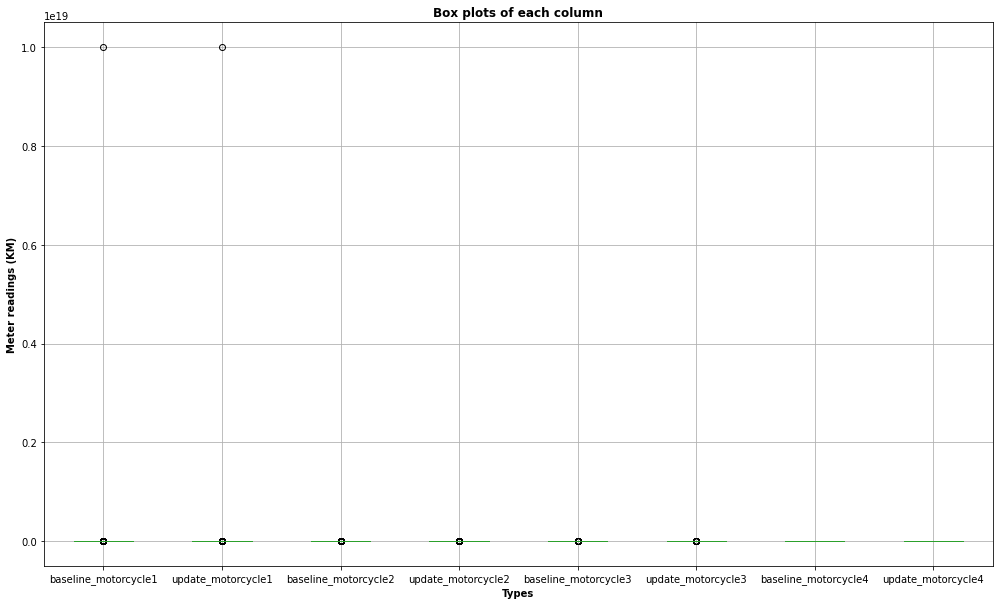

In [16]:
# Visualize the distribution of the data to see any extreme outliers 

bplot = data.boxplot(column= ['baseline_motorcycle1','update_motorcycle1','baseline_motorcycle2',
                              'update_motorcycle2','baseline_motorcycle3','update_motorcycle3','baseline_motorcycle4',
                              'update_motorcycle4'],figsize=[17,10])

bplot.set_xlabel("Types",fontweight ='bold')
bplot.set_ylabel("Meter readings (KM)",fontweight ='bold')
bplot.set_title("Box plots of each column",fontweight ='bold')

It is clear from the boxplot that there are implausible values in the first two columns at 1e^19 km.

These values must be removed.

Text(0.5, 1.0, 'Box plots of each column')

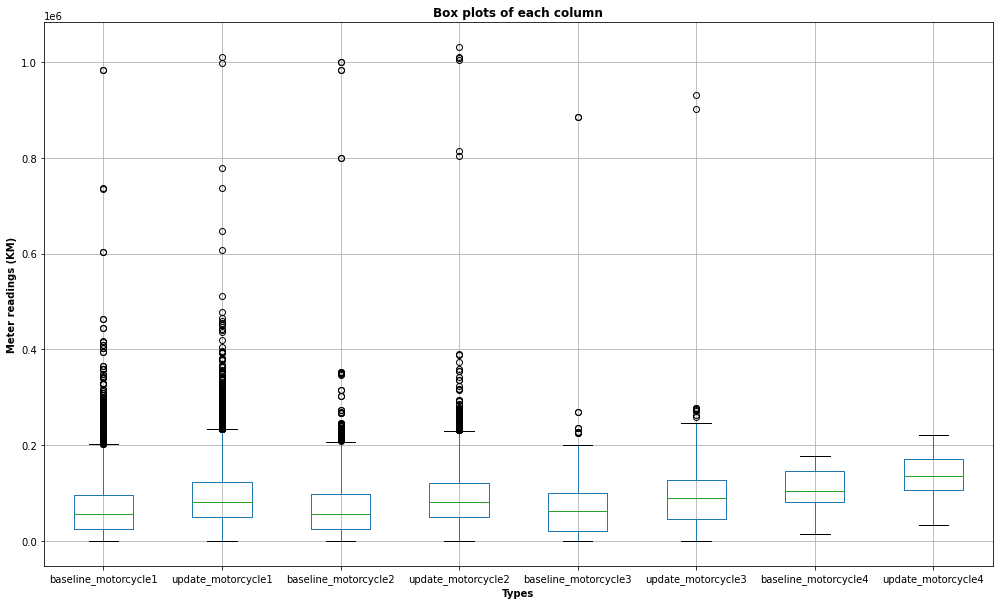

In [17]:
# There are very large values at baseline and update1, so we remove all values that are bigger than 10**18
data = data.loc[(data.loc[:,'baseline_motorcycle1': 'update_motorcycle4'].fillna(0)< 10**18).all(axis=1)]

# Visualize the distribution of the data to check if there are more implausible outliers

bplot = data.boxplot(column= ['baseline_motorcycle1','update_motorcycle1','baseline_motorcycle2',
                              'update_motorcycle2','baseline_motorcycle3','update_motorcycle3','baseline_motorcycle4',
                              'update_motorcycle4'],figsize=[17,10])

bplot.set_xlabel("Types",fontweight ='bold')
bplot.set_ylabel("Meter readings (KM)",fontweight ='bold')
bplot.set_title("Box plots of each column",fontweight ='bold')

Here, the are still outliers as shown in the boxplot above, for example, the points shown at $1e^{6}$. Although we believe that it is unlikely for a motorcycle to travel 1 million kilometers and that it is highly unlikely that a motorcycle that traveled 1 million kilometers will get insured in the first place (will be very expensive), we will not remove them as we do not have a strong reason that this is the case (it is not mentioned anywhere that a motorcycle with a million km will not get insured). We believe that the owner here might have added an extra zero, but we do not have any proof. On the other side, all updated values are larger than the baseline_values, which means the same motorcycle had 2 high values which makes it more unlikely to be an added zero. **So to sum up, we do not remove these large values**

In [18]:
# Again, update index list after dropping rows
new_ind_arr = np.arange(data['baseline_motorcycle1'].size) 
s = pd.Series(new_ind_arr)
data = data.set_index(s)
data

,condition,id,baseline_motorcycle1,update_motorcycle1,baseline_motorcycle2,update_motorcycle2,baseline_motorcycle3,update_motorcycle3,baseline_motorcycle4,update_motorcycle4,motorcycle_count
0,Sign Top,1,896,39198,NaN,NaN,NaN,NaN,NaN,NaN,1
1,Sign Bottom,2,21396,63511,32659.0,47605.0,NaN,NaN,NaN,NaN,2
2,Sign Bottom,3,21340,37460,44998.0,59002.0,NaN,NaN,NaN,NaN,2
3,Sign Bottom,4,23912,59136,NaN,NaN,NaN,NaN,NaN,NaN,1
4,Sign Bottom,5,16862,59292,NaN,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...
12591,Sign Bottom,13483,32050,33346,NaN,NaN,NaN,NaN,NaN,NaN,1
12592,Sign Top,13484,20970,61552,42391.0,46815.0,NaN,NaN,NaN,NaN,2
12593,Sign Bottom,13486,30700,32916,89680.0,139570.0,NaN,NaN,NaN,NaN,2
12594,Sign Top,13487,29884,35459,NaN,NaN,NaN,NaN,NaN,NaN,1


### 2.4

If there are outliers present in the data, then it is better to summarize the data numerically using the median. This is because the mean is not robust to outliers, which means that the value of the mean can be distorted by outliers, unlike the median. This is highlighted in task 2.3, where the mean was very large before removing the outliers for baseline_motorcycle1 and update_motorcycle1 columns, unlike the median whose value did not change dramatically after the removal of the outliers. 

### Task 3 — 12pts

One of the challenges with the current data is that it is not clear how to handle policies with multiple motorcycles.

1. Create three additional columns in the dataframe, `baseline_average`, `update_average`, and `diff_average`. These 
should contain, respectively, the average value for `baseline_motorcycle[1-4]` for all motorcycles insured; the average
 value for `update_motorcycle[1-4]`; and the difference between the average updated value and the average baseline 
 value.
2. **Discuss:** Propose another way of aggregating distinct motorcycles from a single policy. Point out a way in which 
this aggregation may be either better or worse than taking the average for the purpose of comparing the two scenarios in
 the study (sign at the top vs. sign at the bottom).
3. To get a sense of the impact that policies with multiple motorcycles may have in the study, let's perform some 
additional analyses. Plot the distribution of motorcycles per policy in the data. Your plot should allow for the 
meaningful comparison of the values shown.
4. In 3.1, you calculated the average kilometrage for each policy for the updated contract. Calculate the mean and the 
standard deviation of these values (which should be in the column `update_average`).
5. Another meaningful metric is the average kilometrage **per motorcycle**, not distinguishing motorcycles in different 
policies (i.e., pooled across policies). **Considering only policies with 4 motorcycles insured,** calculate the mean 
and the standard deviation of the kilometrage per motorcycle in the updated contract.
6. **Discuss:** To analyze whether signing at the top decreases dishonesty, we could consider the data in different 
ways. We could first calculate the average value per motorcycle within each policy and have one data point per policy 
**or** we could analyze the data at the motorcycle level and have one data point per motorcycle in the dataset. 
According to questions 3.4 and 3.5, how may this decision influence the results of the study?
---

### 3.1

In task 3.1 it is asked to calculate baseline_average, update_average, and diff_average. We do this using the built-in function mean to get the mean value of each row (policy) for the baseline and updated contracts. Then we subtract the baseline mean from the updated mean to get a positive difference.

In [19]:
avg_base = data[['baseline_motorcycle1', 'baseline_motorcycle2','baseline_motorcycle3','baseline_motorcycle4']].mean(axis=1)
avg_upd = data[['update_motorcycle1', 'update_motorcycle2','update_motorcycle3','update_motorcycle4']].mean(axis=1)
diff = avg_upd - avg_base 

data['baseline_average'] = avg_base
data['update_average'] = avg_upd
data['diff_average'] = diff
data.head(5)

,condition,id,baseline_motorcycle1,update_motorcycle1,baseline_motorcycle2,update_motorcycle2,baseline_motorcycle3,update_motorcycle3,baseline_motorcycle4,update_motorcycle4,motorcycle_count,baseline_average,update_average,diff_average
0,Sign Top,1,896,39198,NaN,NaN,NaN,NaN,NaN,NaN,1,896.0,39198.0,38302.0
1,Sign Bottom,2,21396,63511,32659.0,47605.0,NaN,NaN,NaN,NaN,2,27027.5,55558.0,28530.5
2,Sign Bottom,3,21340,37460,44998.0,59002.0,NaN,NaN,NaN,NaN,2,33169.0,48231.0,15062.0
3,Sign Bottom,4,23912,59136,NaN,NaN,NaN,NaN,NaN,NaN,1,23912.0,59136.0,35224.0
4,Sign Bottom,5,16862,59292,NaN,NaN,NaN,NaN,NaN,NaN,1,16862.0,59292.0,42430.0


### 3.2
Taking the maximum value of the odometer kilometrage of distinct motorcycles from a single policy (maximum distance traveled in a single policy) could be another way to aggregate the data. This could provide a more interesting insight that the mean/average as it was mentioned in the data description provided that:

Motorcycles with lower kilometrage are less likely to have issues, and thus will result in a lower insurance premium. Therefore, customers have an incentive to lie, reporting a kilometrage lower than the real value, in order to save money.

Hence, lying is more likely for motorcycles with higher meter readings than lower and accordingly, if the maximum is taken, it can show the result of the study (sign at the top vs. sign at the bottom) more clearly.


### 3.3 

Here we want to plot the distribution of motorcycles per policy, so we plot a histogram of the column motorcycle count, as it will show how many motorcycles are present in each policy.

Text(0, 0.5, 'Number of policies')

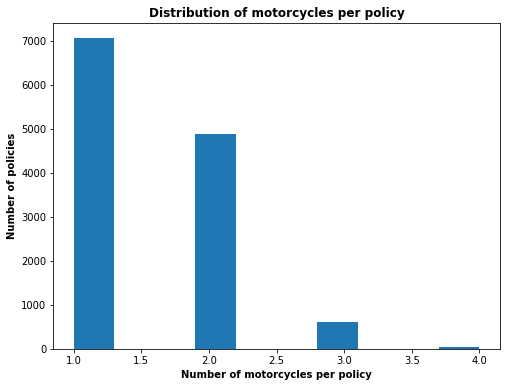

In [20]:
plt.figure(figsize=(8,6))
plt.hist(data['motorcycle_count'])
plt.title('Distribution of motorcycles per policy',fontweight ='bold')
plt.xlabel('Number of motorcycles per policy',fontweight ='bold')
plt.ylabel('Number of policies',fontweight ='bold')

From the figure above, we see that policies with one or two motocyles dominate the data set.

Moreover, policies with one motorcycle alone accounts for more than half of the samples in the data set.

### 3.4

Here, we are tasked with calculating the mean and the standard deviation for the average kilometrage for each policy for the updated contract. We did this by calculating the mean and standard deviation of the column update_average that was calculated in section 3.1. This was done using the built-in pandas functions mean and std.

In [21]:
mean_updated = data['update_average'].mean()
std_updated = data['update_average'].std()

print("Mean value of the column update_average %.2f " %mean_updated)
print("Standard deviation of the column update_average %.2f" %std_updated)

Mean value of the column update_average 92204.34 
Standard deviation of the column update_average 53013.21


In [22]:
data['update_average'].shape

(12596,)

### 3.5

To get the average kilometrage per motorcycle value, we extract all the policies with 4 motorcycles, flatten the array and calculate the mean.

In [23]:
data_only4 = data[data['motorcycle_count']==4]

data_only4_upd = data_only4[['update_motorcycle1', 'update_motorcycle2','update_motorcycle3','update_motorcycle4']]


data_only4_upd

ALL_vals = data_only4_upd.values
ALL_vals = ALL_vals.flatten('C')

mean_kilo_per = ALL_vals.mean()
std_kilo_per = ALL_vals.std()

print("Mean value of the kilometrage per motorcycle in the updated contract %.2f " %mean_kilo_per)
print("Standard deviation of the kilometrage per motorcycle in the updated contract %.2f" %std_kilo_per)

Mean value of the kilometrage per motorcycle in the updated contract 113443.86 
Standard deviation of the kilometrage per motorcycle in the updated contract 82911.91


### 3.6

To answer question 3.6, we decided first to plot the mean values of both methods and their respective error bars

p-value is 0.000000088 which is smaller than 0.05, so difference is significant between the two methods


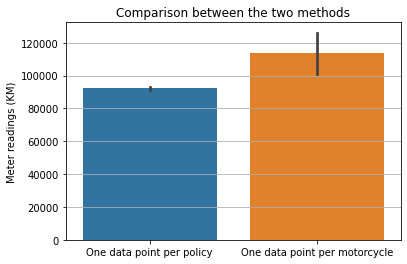

In [24]:
x_pos = np.arange(2)
labels = ['One data point per policy', 'One data point per motorcycle']

ax = sns.barplot( data=[data['update_average'], ALL_vals])
ax.set_ylabel('Meter readings (KM)')
ax.set_xticks(x_pos)
ax.set_xticklabels(labels)
ax.set_title('Comparison between the two methods')
ax.yaxis.grid(True)

# Note: You need the latest scipy version to run this or you will get an error for the alternative arguent 
# Try pip install --upgrade scipy --user (in anaconda prompt) if you do not have the latest scipy version
[s,pvalue] = stats.ttest_ind(data['update_average'], ALL_vals,nan_policy='omit', alternative="less")
print("p-value is %.9f" %pvalue, "which is smaller than 0.05, so difference is significant between the two methods")

**From the figure above** (comparing One data point per policy or One data point per motorcycle) **We can see that using the first method to analyze the data (one data point per policy) has a lower mean meter reading than the second method (One data point per motorcycle) as the error bars do not over lap. To asses this further, we computed a test and the p-value was smaller than 0.05, so the difference is significant between the two methods.**

### Task 4 — 18pts

Now that we have compressed the kilometrage reported in each contract into a single number, it is time to analyze the 
million-dollar question: *does signing at the top decrease dishonesty?*

1. Considering the updated contracts, calculate the mean and the standard deviation of the average kilometrage in a) 
policies where the signing was done at the bottom; and b) policies where the signing was done at the top. Additionally,
plot the two kilometrage distributions.
2. Determine whether the difference between the two scenarios mentioned in 1. is statistically significant.
3. **Discuss:** Recall that the assignment of the different contracts (*sign at the top* vs. *sign at the bottom*) was 
done at random. According to the results in 1. and 2., does signing at the top decrease dishonesty? 
4.  **Discuss:** Given that no intervention was performed in the baseline contract (i.e., everyone signed at the 
bottom). Would you expect any differences between the average values between *sign at the top* vs. *sign at the bottom*
 conditions for the baseline contract? Note that this is related to columns `baseline_motorcycle[1-4]`.
5. Calculate the mean and the standard deviation for the baseline contracts of the two groups (sign at the top vs. sign 
at the bottom). Additionally, plot the two kilometrage distributions.
6. Determine whether the difference between the two scenarios mentioned in 5. is statistically significant.

---

**Hint:** Recall that the column `condition` encodes the experimental condition in which the customer fell when 
reporting the values shown in columns `update_motorcycle[1-4]`!

**Hint:** To determine if the means of two sets of data are significantly different from each other, you may want to use
 the `ttest_ind` function implemented in the 
 [scipy library](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html). To learn more about 
 Student's t-test, check out this [Wikipedia page](https://en.wikipedia.org/wiki/Student%27s_t-test).

### 4.1 

We are supposed to calculate the mean and std of the average kilometrage in the updated policies where:

a) signing was done at the bottom

b) signing was done at the top

Then we should plot the kilometrage distribution.

We start by making one dataframe for sign top and one for sign bottom. The mean and std would each be a single number for each of the dataframes. Then we plot a histogram of the distribution of kilometrages in each of the dataframes and a boxplot to see the outliers more clearly.

In [25]:
# Drops all unrelevant rows for sign at top and sign at bot respectivly
signTop = data.drop(data[data.condition == "Sign Bottom"].index)
signBottom = data.drop(data[data.condition == "Sign Top"].index)

# Made a dataframe for the sign at top update average column
signTopUpdate = signTop['update_average']
# The same for sign at bot
signBottomUpdate = signBottom['update_average']

# The means of the sign top and sign bottom for the updated average
signTopUpdateMean= signTopUpdate.mean()
print('sign top mean:', signTopUpdateMean)
signBottomUpdateMean = signBottomUpdate.mean()
print('sign bottom mean:', signBottomUpdateMean)

# The standard deviations of the sign top and sign bottom updated average
signTopUpdateStd= signTopUpdate.std()
print('sign top std:', signTopUpdateStd)
signBottomUpdateStd = signBottomUpdate.std()
print('sign bottom std:', signBottomUpdateStd)

sign top mean: 85831.56234664578
sign bottom mean: 98755.65578543443
sign top std: 52463.502733460504
sign bottom std: 52780.44051386049


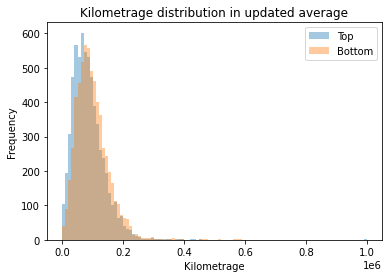

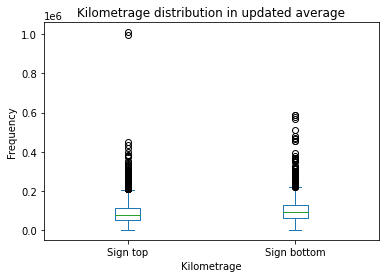

In [26]:
# Plot kilometre distribution
# Put the bins in range to make sure they have equal width and not get messed up by high values in one of the categories
signTopUpdate.plot.hist(bins=range(0, 1000000 + 10000, 10000), alpha=0.4)
signBottomUpdate.plot.hist(bins=range(0, 1000000 + 10000, 10000), alpha=0.4)
plt.title('Kilometrage distribution in updated average')
plt.legend(['Top','Bottom'])
plt.xlabel('Kilometrage')
plt.ylabel('Frequency')
plt.show()

# Renames the axis to distinguish the boxplots
signTopUpdate.rename("Sign top", axis=1, inplace=True)
signBottomUpdate.rename("Sign bottom", axis=1, inplace=True)

# Plot boxplot for distribution
boxpltUpdate = pd.concat([signTopUpdate,signBottomUpdate], axis=1)
boxpltUpdate.plot.box()
plt.title('Kilometrage distribution in updated average')
plt.xlabel('Kilometrage')
plt.ylabel('Frequency')
plt.show()

### 4.2.1

Our hypothesis is that sign top will be higher than sign bottom, so we do a one tailed t-test 

In [27]:
stats.ttest_ind(signTopUpdate,signBottomUpdate,nan_policy='omit', alternative="greater")

Ttest_indResult(statistic=-13.781419842683748, pvalue=1.0)

The p-value is very large (pval=1), so there is no significant difference 

### 4.2.2

We repeat the t-test but now it is double tailed 

In [28]:
stats.ttest_ind(signTopUpdate,signBottomUpdate,nan_policy='omit', alternative='less')

Ttest_indResult(statistic=-13.781419842683748, pvalue=3.374833468956993e-43)

The p-value is very small (smaller than 0.05), which means that the difference is significant.
From 4.2.1 and 4.2.2, it shows that those who signed at the bottom had higher odometer readings than those who signed at the top.

### 4.3
From the results of 4.1 and 4.2, we can see that that signing at the top does not decrease dishonesty (Results of 4.2.1) as we expected those who signed at the top will report higher odometer readings.

However, we see in 4.2 that the difference is statistically significant, so that means that signing at the bottom had higher odometer readings, opposite to what we expected. 


### 4.4
Since there was no intervention in the baseline contract, we expect there to be little to no difference in the average values of the baseline kilometrage for a sign at the top and a sign at the bottom.

### 4.5

The task is very similar to 4.1, but this time we look at the baseline_average for sign at top and sign at bottom

In [29]:
# Takes the 'baseline_average' of the sign top and sign bottom dataframes
# Make a dataframe for the sign at top baseline average column
signTopBaseline = signTop['baseline_average']
# The same for sign at bottom
signBottomBaseline = signBottom['baseline_average']

# The means of the sign top and sign bottom baseline average
signTopBaselineMean= signTopBaseline.mean()
print('sign top mean:', signTopBaselineMean)
signBottomBaselineMean = signBottomBaseline.mean()
print('sign bottom mean:', signBottomBaselineMean)

# The standard deviations of the sign top and sign bottom baseline average
signTopBaselineStd= signTopBaseline.std()
print('sign top std:', signTopBaselineStd)
signBottomBaselineStd = signBottomBaseline.std()
print('sign bottom std:', signBottomBaselineStd)

sign top mean: 59721.24066823283
sign bottom mean: 75145.23797831805
sign top std: 50724.67068673372
sign bottom std: 51115.69467292577


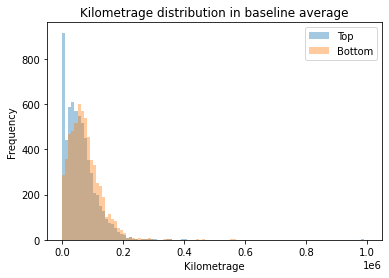

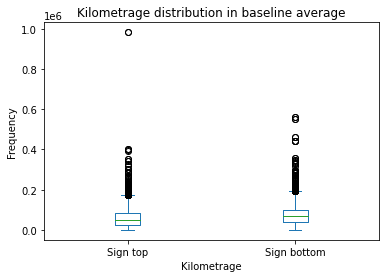

In [30]:
# Plot kilometre distribution
# Put the bins in range to make sure they have equal width and not get messed up by high values in one of the categories
signTopBaseline.plot.hist(bins=range(0, 1000000 + 10000, 10000), alpha=0.4)
signBottomBaseline.plot.hist(bins=range(0, 1000000 + 10000, 10000), alpha=0.4)
plt.title('Kilometrage distribution in baseline average')
plt.legend(['Top','Bottom'])
plt.xlabel('Kilometrage')
plt.ylabel('Frequency')
plt.show()

# Renames the axis to distinguish the boxplots
signTopBaseline.rename("Sign top", axis=1, inplace=True)
signBottomBaseline.rename("Sign bottom", axis=1, inplace=True)
# Plot boxplot for distribution
boxpltBase = pd.concat([signTopBaseline,signBottomBaseline], axis=1)
boxpltBase.plot.box()
plt.title('Kilometrage distribution in baseline average')
plt.xlabel('Kilometrage')
plt.ylabel('Frequency')
plt.show()

### 4.6.1

In [31]:
stats.ttest_ind(signTopBaseline,signBottomBaseline,nan_policy='omit', alternative='greater')

Ttest_indResult(statistic=-16.9969781183719, pvalue=1.0)

The p-value is very large (pval=1), so there is no significant difference 

### 4.6.2

We repeat the t-test but now it is double tailed 

In [32]:
[s,pvalue] = stats.ttest_ind(signTopBaseline,signBottomBaseline,nan_policy='omit', alternative='less')
print("p-value =",pvalue)

p-value = 2.235786248096221e-64


The p-value is very small (smaller than 0.05), which means that the difference is significant

Again the p-value is very low, which indicates that there is a statistical significance between the data and that those who signed at the bottom reported higher values, which does not make sense since there were no interventions with baseline contracts. Another thing that caught our attention is that we clearly see that the plots are very different for the first bin, where sign at the top is way higher.

## Interlude: Something is dodgy about this data...

---

Noticing the oddities in the data, you send an email to your contact at the insurance company asking about the integrity
 of the data. Their reply seems like something out of a detective movie:

> Dear researcher, I believe that this data is not to be trusted. I can't talk right now but will send further hints 
>throughout the week.

As a researcher, you know that [data integrity](https://en.wikipedia.org/wiki/Data_integrity) is a big deal, and decide
 to investigate.

### Task 5 — 9pts

The first hint you receive is: *there is something off about the kilometrage values in the data.*

1. For the baseline contract and for the updated contract, plot the distribution of odometer kilometrage reported for 
the first motorcycle insured in each policy. 
2. For the first motorcycle insured by the company in each policy, plot the difference between the number of kilometers
 reported in the baseline and in the updated contract.
3. **Discuss:** why is this data unlikely to have originated from real odometer readings?

---

### 5.1.1

We decide to use a column histogram since we are supposed to plot the distribution of a single variable with many frequencies.

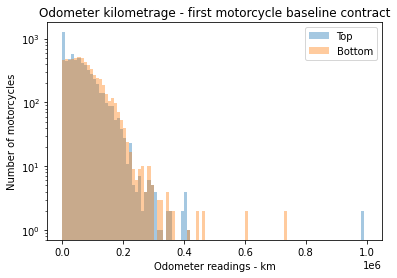

In [33]:
# Extracts the data
dTop = signTop['baseline_motorcycle1']
dBot = signBottom['baseline_motorcycle1']

# Plots the histogram
dTop.plot.hist(bins=range(0, 1000000 + 10000, 10000), alpha = 0.4)
dBot.plot.hist(bins=range(0, 1000000 + 10000, 10000), alpha = 0.4)
plt.legend(['Top','Bottom'])

# Names the axes and the chart
plt.xlabel('Odometer readings - km')
plt.ylabel('Number of motorcycles')
plt.title('Odometer kilometrage - first motorcycle baseline contract');
plt.yscale('log')
# Display the chart
plt.show()

### 5.1.2

We do the same for the updated values.

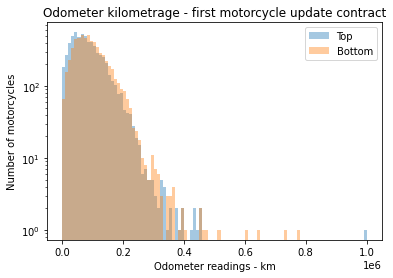

In [34]:
duTop = signTop['update_motorcycle1']
duBot = signBottom['update_motorcycle1']

duTop.plot.hist(bins=range(0, 1000000 + 10000, 10000), alpha = 0.4)
duBot.plot.hist(bins=range(0, 1000000 + 10000, 10000), alpha = 0.4)
plt.legend(['Top','Bottom'])

plt.xlabel('Odometer readings - km')
plt.ylabel('Number of motorcycles')
plt.title('Odometer kilometrage - first motorcycle update contract');
plt.yscale('log')
plt.show()

### 5.2

For the first motorcycle insured by the company in each policy, we plot the difference between the number of kilometers reported in the baseline and in the updated contract.

maxDiff: 49997


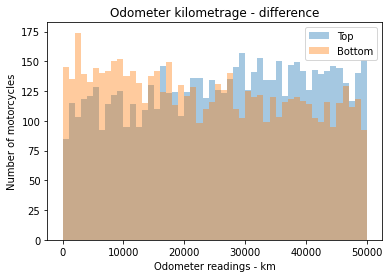

In [35]:
# Extract the data which is relevant, all columns with baseline_motorcycle1 and update_motorcycle1
diffTop = duTop-dTop
diffBot = duBot-dBot

# Find the max amount of difference to adjust the histogram right
maxDiff = int(max(diffTop.max(),diffBot.max()))
print('maxDiff:',maxDiff)
# Plots the data on a histogram and labeled the data
diffTop.plot.hist(bins=range(0, maxDiff + 1000, 1000), alpha = 0.4)
diffBot.plot.hist(bins=range(0, maxDiff + 1000, 1000), alpha = 0.4)
plt.legend(['Top','Bottom'])

# Names the axes and the chart
plt.xlabel('Odometer readings - km')
plt.ylabel('Number of motorcycles')
plt.title('Odometer kilometrage - difference');
plt.show()

### 5.3

From the **Figure above** it seems that those who signed at the bottom of the page register a lower difference between the baseline and the updated contract. While the people who sign on the top register higher differences. That may indicate that that the ones who signed at the top might be more honest because they would lose out on reporting a higher difference. 

For the baseline kilometrage, the people who signed at the top registered a higher amount of small kilometrages, while the difference for larger values is not that big. The same applies for the updated contracts.

### Task 6 — 15pts

The second hint you receive is: *there is something off with the last digits of the reported kilometrages.*

1. Considering the baseline kilometrage of the first motorcycle in each contract (`baseline_motorcycle1`), plot the 
distribution of occurrences of the last three digits. Repeat the same for the updated kilometrage of the first 
motorcycle in each contract (`update_motorcycle1`).

3. **Discuss:** What are the differences between the two distributions?

4. **Discuss:** Hypothesize a **plausible** cause for the patterns observed in the digit distribution of the baseline
 kilometrage of the first motorcycle.
    
---

**Hint:** The last two digits of the number 12314 are 314. Note that you should consider the three last digits together,
 not separately!

### 6.1

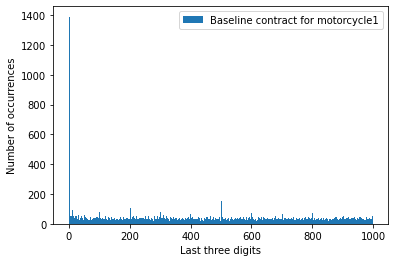

In [59]:
# We take the modulo 1000 of the column which gives the last three digits
baseline_1 = (data['baseline_motorcycle1'])% 1000
# Same for the updated contracts
update_1 = data['update_motorcycle1']%1000

# Plot the distribution of occurrences: 
plt.hist([baseline_1], bins = 300, label = ["Baseline contract for motorcycle1"])
plt.legend() 
plt.xlabel('Last three digits')
plt.ylabel('Number of occurrences')
plt.show()

In [37]:
update_1.shape

(12596,)

In [51]:
baseline_1[baseline_1 == 000].shape

(1322,)

### 6.2
We can see that here is a lot of motorcycles in the baseline contract that have an odomoter that finish in the neighborhood of 000. Also, we can see that the distribution is concentrated around the round numbers especially those begining with an odd number. 

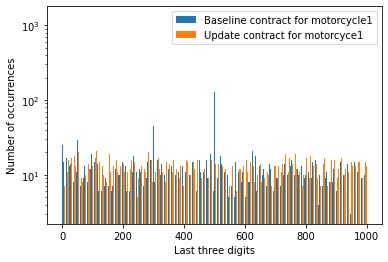

In [39]:
# Plot the distribution of occurrences: 
plt.hist([baseline_1, update_1], bins =1000, label = ["Baseline contract for motorcycle1", "Update contract for motorcyce1"])
plt.legend() 
plt.xlabel('Last three digits')
plt.ylabel('Number of occurrences')
plt.yscale('log')
plt.show()

In addition, if we modify the bins to 1000 (meaning the size of the of the x-abscissa) we can see that there is a big number of motorcycle in the baseline contract that have an odometre near to 500. On the other hand, in the updated contracts we can see a more homogeneous distribution of the three last digits. 

### 6.3
We can argue that a pausible cause of the digit distribution is that people lie and group the endings around round numbers. In the baseline contract the signature is asked at the end of the document and so, as suggested in this project, the people are more willing to lie (give grouped numbers). We can not recognize this pattern with the updated contract where about 50% of the people signed at the top. The fact that there are a lot of numbers finishing around 000 can be explain by new motorcycles in the baseline contract. To check that there is a lot of new motorcycles and not some other datacorruption we can lookup the motorcycles with less odometer than 10 in the baseline:

In [40]:
data.loc[data.baseline_motorcycle1 < 10]

,condition,id,baseline_motorcycle1,update_motorcycle1,baseline_motorcycle2,update_motorcycle2,baseline_motorcycle3,update_motorcycle3,baseline_motorcycle4,update_motorcycle4,motorcycle_count,baseline_average,update_average,diff_average
112,Sign Top,119,0,20345,NaN,NaN,NaN,NaN,NaN,NaN,1,0.000000,20345.000000,20345.0
123,Sign Top,130,0,19287,NaN,NaN,NaN,NaN,NaN,NaN,1,0.000000,19287.000000,19287.0
149,Sign Top,157,2,15341,NaN,NaN,NaN,NaN,NaN,NaN,1,2.000000,15341.000000,15339.0
200,Sign Top,213,5,31002,NaN,NaN,NaN,NaN,NaN,NaN,1,5.000000,31002.000000,30997.0
345,Sign Top,367,5,40044,16565.0,25368.0,NaN,NaN,NaN,NaN,2,8285.000000,32706.000000,24421.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12219,Sign Top,13077,6,24011,NaN,NaN,NaN,NaN,NaN,NaN,1,6.000000,24011.000000,24005.0
12248,Sign Top,13110,0,34340,NaN,NaN,NaN,NaN,NaN,NaN,1,0.000000,34340.000000,34340.0
12463,Sign Top,13339,0,48464,NaN,NaN,NaN,NaN,NaN,NaN,1,0.000000,48464.000000,48464.0
12494,Sign Bottom,13375,0,33153,59280.0,95666.0,94400.0,133206.0,NaN,NaN,3,51226.666667,87341.666667,36115.0


We can see that there are a lot of new motorcycles in the baseline.

### Task 7 — 15pts

The third (and last) hint you receive is: *there is something wrong with the fonts.*

Your anonymous source explains that the `.tsv` file sent to you was derived from an Excel sheet. There, some of the rows
 were written in the font *Helvetica* while others were written in the font *Arial*. Your anonymous source sends you a 
 file with the relation between policy id and the font used in the respective row (`fonts.csv`), and tells you that the
  rows with *Helvetica* font were fabricated.

1. Load `fonts.csv` and merge the `font` column into your pandas dataframe.
2. Considering only the kilometrage of the first motorcycle in each policy, calculate the number of rows with the Arial 
and the Helvetica font, respectively. Also, plot the distribution of baseline kilometers for rows with the Arial font 
and for rows with the Helvetica font.
3. Similar to what was done in task 6. Plot the distribution of the last three digits for 1) the first motorcycle in 
each baseline contract (`baseline_motorcycle1`); and 2) the first motorcycle in each updated contract
 (`update_motorcycle1`).
4. **Discuss:** Why do these analyses provide evidence that the rows with Helvetica font were fabricated?

---

### 7.1

We are supposed to merge the font column into our main dataframe.

In [41]:
# Get the font data from the csv to a dataframe
fonts = pd.read_csv('data/fonts.csv', sep = ',', on_bad_lines='skip')
# Before merging we need to drop the same rows that we dropped in data in task 2 on="ID"
dataWFonts = pd.merge(data, fonts, on="id")
# Check the new dataframe
dataWFonts.tail(3)

,condition,id,baseline_motorcycle1,update_motorcycle1,baseline_motorcycle2,update_motorcycle2,baseline_motorcycle3,update_motorcycle3,baseline_motorcycle4,update_motorcycle4,motorcycle_count,baseline_average,update_average,diff_average,font
12593,Sign Bottom,13486,30700,32916,89680.0,139570.0,NaN,NaN,NaN,NaN,2,60190.0,86243.0,26053.0,Helvetica
12594,Sign Top,13487,29884,35459,NaN,NaN,NaN,NaN,NaN,NaN,1,29884.0,35459.0,5575.0,Helvetica
12595,Sign Top,13488,22930,37888,NaN,NaN,NaN,NaN,NaN,NaN,1,22930.0,37888.0,14958.0,Helvetica


### 7.2

We are supposed to calculate the amount of rows with Helvetica and Arial respectivly. Then we should plot the baseline kilometrage distribution for the rows with the different font for the first motorcycle only.

In [42]:
# Make a dataframe with only helvetica
helveticaF = fonts[(fonts['font'] == 'Helvetica')]
# Count rows
helveticaNum = helveticaF.count()
# Print amout of helvetica rows
print('helvetica', helveticaNum)

# Make dataframe with only arial
arialF = fonts[(fonts['font'] == 'Arial')]
# Count rows
arialNum = arialF.count()
# Print amount of arial rows
print('arial', arialNum)

helvetica id      6743
font    6743
dtype: int64
arial id      6744
font    6744
dtype: int64


We can see the number of rows with arial and helvetica fonts are almost the same.

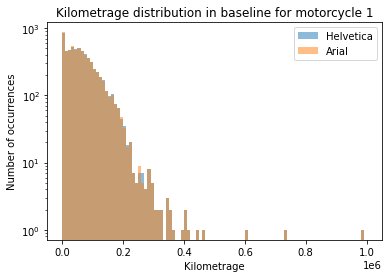

In [43]:
# Plot of distribution for baseline kilometrage for the rows with the different font for first motorcycle only
# Make a dataset with all the data, but only helvetica rows
helvetica = dataWFonts[(dataWFonts['font'] == 'Helvetica')]
# Make a dataset with all the data, but only arial rows
arial = dataWFonts[(dataWFonts['font'] == 'Arial')]

helvetica['baseline_motorcycle1'].plot.hist(bins=range(0, 1000000 + 10000, 10000), alpha=0.5)
arial['baseline_motorcycle1'].plot.hist(bins=range(0, 1000000 + 10000, 10000), alpha=0.5)
plt.title('Kilometrage distribution in baseline for motorcycle 1')
plt.legend(['Helvetica','Arial'])
plt.xlabel('Kilometrage')
plt.ylabel('Number of occurrences')
plt.yscale('log')
plt.show()

### 7.3.1

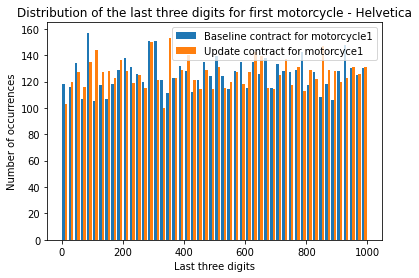

In [44]:
# We repeat the task 6.1 for contracts in helvetica form: 
baseline_h1 = helvetica['baseline_motorcycle1']% 1000 
update_h1 = helvetica['update_motorcycle1']%1000 
plt.hist([baseline_h1, update_h1], bins=range(0, 1000 + 20, 20), label = ["Baseline contract for motorcycle1", "Update contract for motorcyce1"])
plt.legend() 
plt.xlabel('Last three digits')
plt.ylabel('Number of occurrences')
plt.title('Distribution of the last three digits for first motorcycle - Helvetica')
plt.show()

### 7.3.2

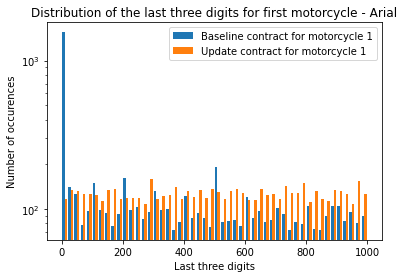

In [45]:
# We repeat the task 6.1 for contracts in arial form: 
baseline_a1 = arial['baseline_motorcycle1']%1000
update_a1 = arial ['update_motorcycle1']%1000
plt.hist([baseline_a1, update_a1], bins=range(0, 1000 + 20, 20), label= ["Baseline contract for motorcycle 1", "Update contract for motorcycle 1"])
plt.legend()
plt.xlabel('Last three digits')
plt.ylabel('Number of occurences')
plt.yscale('log')
plt.title('Distribution of the last three digits for first motorcycle - Arial')
plt.show()

### 7.4

It appears that rows with Helvetica font have been fabricated as they seem to be generated from a uniform distribution, which is almost impossible to achieve because many people have difficulty in generating random numbers **with equally likely outcomes.** 
reference = https://www.tandfonline.com/doi/abs/10.1080/08989629508573866.

This reference highlights that **"The present paper shows that even with a conscious effort to construct random digits, many subjects are unable to produce digits with a uniform distribution."**


Unlike the rows with Arial fonts, which appear to be generated from a Heavy-tailed distribution. 

### Task 8 — 15pts

You've had enough! You decide to write an email to your PI (principal investigator, also known as "your boss") reporting
 the oddities you have observed in the data. Write a (brief) text (in markdown) of up to 300 words. Your text should:

- Use the analyses you did to make a convincing case that the data has been tampered with. 
- Grounded in your analyses, provide a plausible hypothesis about how the data has been tampered with.
- Discuss whether the data leads to the conclusion that signing at the top decreases dishonesty.

Structure your text into three bullets, analogous to the ones above.

You can reference images present in the notebook by indicating a task (e.g., image plotted in Task 3.3) or a cell 
number.

Note that you do not need to conduct any additional analysis to write this text. If you do, the code should be at the 
end of this notebook, i.e., after your answer.

---

**Hint:** The data has been tampered with in more than one way.

### 8

1. Use the analyses you did to make a convincing case that the data has been tampered with.
    - The data has clearly been tampered with. First, we can say that the contracts for updates policies were not given out at random, in fact, we can see that in the task 5, there are more people with new motorcycles, meaning with very low odometers kilometrage, who got to sign at the top of the document. This may distort our results. In addition, we showed in the task 7 that the rows of the Helvetica font have been fabricated as a result of the uniform distribution which can’t be possible. Indeed, as mentioned in section 7.4, it is not possible for humans to generate a uniform distribution. This shows that the data were fabricated.
2. Grounded in your analyses, provide a plausible hypothesis about how the data has been tampered with.
    - As mentioned in section 7.4, it is not possible for humans to generate a uniform distribution. We believe that the data could have been generated using a computer number generator.
3. Discuss whether the data leads to the conclusion that signing at the top decreases dishonesty.
    - From our analysis, we showed in the task 5 that at a higher odometer reading the difference between the updated and baseline contract was higher for signing at the top.  But we also get that those who signed at the bottom have higher mean of odometer readings than those who signed at the top. Besides, the t-test carried out in the previous tasks confirms that when signing at the bottom, the odometer kilometrage is higher that signing at the bottom. We then reach the conclusion that signing at the top does not decrease dishonesty. Nevertheless, we think that the experiment should be repeated using real/unfabricated data to draw a conclusion.